In [7]:
import matplotlib.pyplot as plt

In [13]:
import pandas as pd

df_data = pd.DataFrame(data = pd.read_json('../data/data.json'))
df_data_invertido = df_data.T

x = df_data_invertido.index
y = df_data_invertido.groupby("media_recompensa")["vezes"].sum()

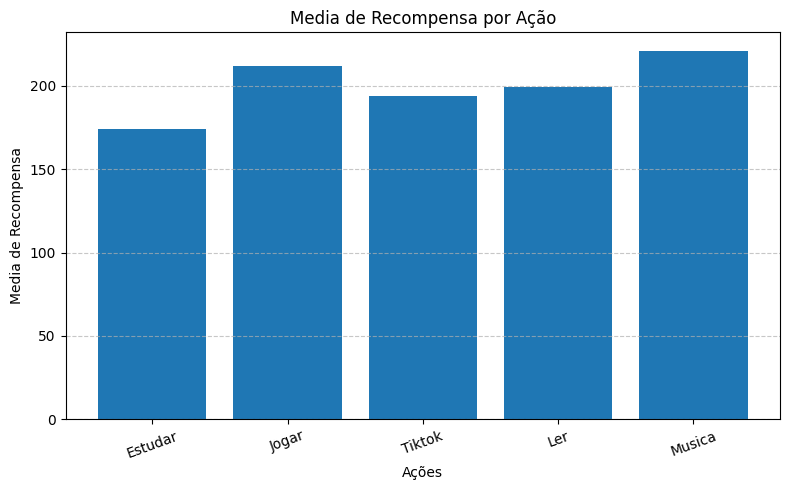

In [14]:
plt.figure(figsize=(8, 5))
plt.bar(x, y)
plt.xlabel('Ações')
plt.ylabel('Media de Recompensa')
plt.title('Media de Recompensa por Ação')
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

*PRIMEIRO TREINO DO MODELO, PARA PREVER QUAL AÇÃO ELE VAI TOMAR*
--- 

- Ler o dataset

- Transformar acao em valores numéricos (LabelEncoder)

- Separar treino e teste (train_test_split)

- Treinar um modelo (RandomForest, LogisticRegression, ou até um modelo simples de regressão logística para início)

- Avaliar a acurácia

- Usar o modelo para prever a próxima ação

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Ler o dataset
df = pd.read_csv("../data/dataset.csv")

# 2. Transformar acao em valores numéricos (LabelEncoder)
le = LabelEncoder()
df["acao_enconded"] = le.fit_transform(df["acao"])

# 3. Separar treino e test (train_test_split)
xX = df[["dopamina","recompensa_real"]]
y = df["acao_enconded"]

# 4. Dividir o treino teste
X_train, X_test, y_train, y_test = train_test_split(xX, y, test_size=0.2, random_state=42)

# 5. Treinar o modelo 
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 6. Avaliar
y_pred = model.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))

# 7. Exemplo de previsão
nova_dopamina = 7.5
nova_recompensa = 8.0
acao_prevista = le.inverse_transform(model.predict([[nova_dopamina, nova_recompensa]]))
print("Próxima ação prevista", acao_prevista[0])

Acurácia: 0.17
Próxima ação prevista Ler


c:\Users\onlin\Desktop\portifolio\projects\simulador-de-recompensa-IA\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


*Resultados*

**1° Teste**

- Acurácia: 0.125
- Ação Prevista: Estudar
- Total linhas para treino: 40
- Conclusão: O modelo está acertando 1 a cada 8 previsões, está em overfitting ou underfittingm, a porcentagem de 12,5% é muito baixa. 
----
**2° Teste**

- Acurácia: 0.163
- Ação Prevista: Estudar
- Total linhas para treino: 1042
- Conclusão: O modelo retornou com 16% de acerto, abaixo de 20% o que é considerado um "chute". Falta mais "features" para ele conseguir rodar bem.

In [27]:
df['acao'].value_counts(normalize=True) * 100

acao
Tiktok     21.923077
Estudar    20.865385
Ler        20.288462
Jogar      19.423077
Musica     17.500000
Name: proportion, dtype: float64